# Chapter 2


## 2.1 Data Manipulation

In [4]:
import torch

In [5]:
x = torch.arange(12,dtype= torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [6]:
x.numel() #the number of elements

12

In [7]:
x.shape

torch.Size([12])

In [8]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [9]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [10]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [11]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [13]:
X[1,2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
X[:2,:]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [15]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [16]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

In [20]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [21]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [22]:
before = id(Y)
Y = Y+id(Y)
id(Y)==before

False

In [23]:
Z = torch.zeros_like(Y) #Z has the same shape of Z=Y
print('id(Z):',id(Z))
Z[:] = X+Y #Why use Z[:] instead of Z? 
print('id(Z):',id(Z))

id(Z): 2579458697320
id(Z): 2579458697320


In [24]:
before = id(X)
X += Y
id(X) == before
#X is not allocated new, the value of X is changed.

True

In [25]:
A = X.numpy()
B = torch.from_numpy(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [26]:
a = torch.tensor([3.5])
a, a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 Data Preprocessing

In [27]:
import os

os.makedirs(os.path.join('', 'data'), exist_ok=True)
data_file = os.path.join('', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [28]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [29]:
inputs,targets = data.iloc[:,0:2],data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na = True) #same with encoding process
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [30]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [31]:
import torch

X = torch.tensor(inputs.to_numpy(dtype = float))
y = torch.tensor(targets.to_numpy(dtype = float))
X,y 

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

In [32]:
import torch

In [33]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [34]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [35]:
x[2]

tensor(2)

In [36]:
len(x)

3

In [37]:
x.shape

torch.Size([3])

In [38]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [39]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [40]:
A = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A==A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [41]:
torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [42]:
A = torch.arange(6,dtype = torch.float32).reshape(2,3)
B = A.clone()
A,A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [43]:
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [44]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [45]:
x = torch.arange(3,dtype = torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [46]:
A.shape,A.sum()

(torch.Size([2, 3]), tensor(15.))

In [47]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [48]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [49]:
A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [50]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [51]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [52]:
sum_A = A.sum(axis =1, keepdims = True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [53]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [54]:
A/sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [55]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [56]:
y = torch.ones(3,dtype = torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [57]:
torch.sum(x*y)

tensor(3.)

In [58]:
A.shape, x.shape, torch.mv(A,x), A@x # mv is matrix-vector multiplication

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [59]:
B = torch.ones(3,4)
torch.mm(A,B), A@B ## mm is matrix-matrix multiplication

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [60]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [61]:
torch.abs(u).sum()

tensor(7.)

In [62]:
torch.norm(torch.ones((4,9)))

tensor(6.)

## 2.5 Automatic Differentiation

In [63]:
import torch

In [64]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [65]:
x.requires_grad_(True)
x.grad

In [66]:
y= 2*torch.dot(x,x) 
y

tensor(28., grad_fn=<MulBackward0>)

In [67]:
y.backward() #gradient is 4x
x.grad

tensor([ 0.,  4.,  8., 12.])

In [68]:
x.grad == 4*x

tensor([True, True, True, True])

In [69]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [70]:
x.grad.zero_()
y= x*x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

In [71]:
x.grad.zero_()
y= x*x 
u = y.detach() 
z = u*x 

z.sum().backward()
x.grad ==u

tensor([True, True, True, True])

In [72]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [73]:
def f(a):
    b = a*2
    while b.norm()<1000:
        b = b*2
    if b.sum()>0:
        c=b 
    else:
        c = 100*b 
    return c 

In [74]:
a = torch.randn(size=(),requires_grad = True)
d = f(a)
d.backward()

In [75]:
a.grad == d/a

tensor(False)

## Discussion
We store the data(input, weight, label...) to make the model. 
While mean or mode can be used to handle missing values, there is a need to consider how to address missing values for categorical data.

Difference between clone() and detach()
-> clone() creates a copy of the tensor and gradient of tensor remains. Also, detach() creates a copy of the tensor,but no gradients will be computed for operations involving this tensor.  

# Chapter 3

## 3.1 Linear Regression

In [76]:
!pip install d2l==1.0.0a0

In [77]:
%matplotlib inline
import math 
import time
import numpy as np
import torch
from d2l import torch as d2l 

In [78]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [79]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time()-t:.5f} sec'

'0.07452 sec'

In [80]:
t = time.time()
d = a+b 
f'{time.time()-t:.5f} sec'

'0.00100 sec'

In [81]:
def normal(x, mu, sigma):
    p = 1/math.sqrt(2 *math.pi* sigma**2)
    return p*np.exp(-0.5*(x-mu)**2/sigma**2)

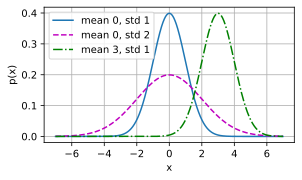

In [82]:
x = np.arange(-7, 7, 0.01)

params = [(0,1), (0,2), (3,1)]
d2l.plot(x, [normal(x,mu,sigma) for mu,sigma in params], 
         xlabel = 'x',
         ylabel = 'p(x)', figsize = (4.5, 2.5),
         legend = [f'mean {mu}, std {sigma}' for mu, sigma in params]
         )

## 3.2 Object-Oriented Design for Implementation

In [83]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [84]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj) #what function setattr do?
    return wrapper

In [85]:
class A:
    def __init__(self):
        self.b = 1
a = A()

In [86]:
@add_to_class(A)

def do(self):
    print('Class attribute "b" is', self.b)
    
a.do()

Class attribute "b" is 1


In [87]:
class HyperParameters:
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [88]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [89]:
class ProgessBoard(d2l.HyperParameters):
    def __init__(self, xlabel =None, ylabel = None, xlim = None,
                 ylim = None, xscale = 'linear',yscale = 'linear',
                 ls=['-','--','-',':'], colors = ['C0','C1','C2','C3'],
                 fig =None, axes=None, figsize=(3.5,2.5),display=True):
        self.save_hyperparameters()
    def draw(self,x,y,label,every_n=1): #what is every_n?
        raise NotImplemented

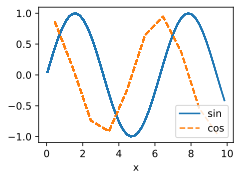

In [90]:
board = d2l.ProgressBoard('x')
for x in np.arange(0,10,0.1):
    board.draw(x,np.sin(x),'sin', every_n=2)
    board.draw(x,np.cos(x),'cos',every_n=10)

In [91]:
class Module(nn.Module,d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2,plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgessBoard()
    
    def loss(self,y_hat,y):
        raise NotImplemented #method is not implemented
    
    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined' #if hasattr is false, the comment is printed
        return self.net(X)

    def plot(self,key,value,train):
        assert hasattr(self,'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch+1
            n = self.trainer.num_val_batches / \
                self. plot_valid_per_epoch
        self.board.draw(x,value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n = int(n))
        
        def training_step(self,batch):
            l = self.loss(self(*batch[:-1]), batch[-1])
            self.plot('loss', l, train = True)
            return l
        
        def validation_step(self, batch):
            l = self.loss(self(*batch[:-1]),batch[-1])
            self. plot('loss', l, train = False)
            
        def configure_optimizers(self):
            raise NotImplementedError

In [92]:
class DataModule(d2l.HyperParameters):
    def __init__(self, root='../data',num_workers = 4):
        self.save_hyperparameters()
    
    def get_dataloader(self,train):
        raise NotImplementedError
    
    def train_dataloader(self):
        return self.get_dataloader(train = True)
    
    def val_dataloader(self):
        return self.get_dataloader(train = False)
        

In [93]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus =0, gradient_clip_val =0):
        self.save_hyperparameters()
        assert num_gpus ==0, 'No GPU support yet'
        
    def prepare_data(self,data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_loader)
        self.num_val_batches = (len(self.val_dataloader) if self.val_dataloader is not None else 0)
    
    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model
        
    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx =0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()
    
    def fit_epoch(self):
        raise NotImplementedError
        

## 3.4 Linear Regression Implementation from Scratch

In [94]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [148]:
class LinearRegressionScratch(d2l.Module):
    def __init__(self, num_inputs, lr, sigma = 0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1,requires_grad=True)

In [149]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self,X):
    return torch.matmul(X,self.w) + self.b

In [150]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self,y_hat,y):
    l = (y_hat-y)**2/2
    return l.mean()

In [151]:
class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        self.save_hyperparameters()
    
    def step(self):
        for param in self.params:
            param -= self.lr * param.grad
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [152]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [153]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self,batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx+=1
    if self.val_dataloader is None:
       return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx+=1
          

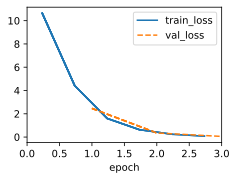

In [154]:
model = LinearRegressionScratch(2,lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2,-3.4]),b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model,data)

In [155]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1222, -0.2073])
error in estimating b: tensor([0.2219])


## Discussion

We aim to mimic the human neural network through Linear Regression. However, it can only be constructed by utilizing not just linear properties, but also non-linear ones.


The current performance is good, but I believe utilizing optimizers other than SGD could potentially improve the performance further.

# Chapter 4

## 4.1 Softmax Regression

## 4.2 The image Classification Dataset

In [103]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()


In [104]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64,resize=(28,28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                     transforms.ToTensor()]) 
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform = trans, download = True
        )
        self.val = torchvision.datasets.FashionMNIST(
            root = self.root, train = False, transform = trans, download = True
        )

In [105]:
data = FashionMNIST(resize = (32,32))
len(data.train),len(data.val)

(60000, 10000)

In [106]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [107]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [labels[int(i)] for i in indices]

In [108]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self,train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader (data, self.batch_size,shuffle=train,num_workers=self.num_workers)


In [109]:
X,y = next(iter(data.train_dataloader())) # what'next' function does?
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [110]:
tic = time.time()
for X,y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'4.26 sec'

In [111]:
def show_image(imgs, num_rows, num_cols, titles = None, scale = 1.5):
    raise NotImplementedError

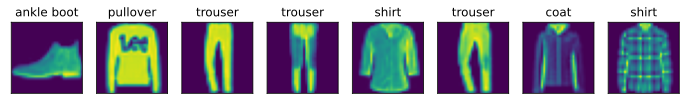

In [112]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows = 1, ncols = 8, labels =[]):
    X,y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1),nrows,ncols,titles = labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 4.3 The Base Classification Model

In [113]:
import torch
from d2l import torch as d2l

In [114]:
class Classifier(d2l.Module):
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1]) # what '*' mean?
        self.plot('loss',self.loss(Y_hat,batch[-1]),train=False)
        self.plot('acc',self.accuracy(Y_hat,batch[-1]),train=False)

In [115]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(),lr = self.lr)

In [167]:
@d2l.add_to_class(Classifier)
def accuracy(self,Y_hat,Y,averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## 4.4 Softmax Regression Implementation from Scratch

In [168]:
import  torch
from d2l import torch as d2l

In [157]:
X = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
X.sum(0, keepdims = True), X.sum(1,keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [175]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [176]:
X = torch.rand((2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2149, 0.2082, 0.2455, 0.1043, 0.2270],
         [0.1433, 0.3068, 0.1696, 0.1933, 0.1870]]),
 tensor([1., 1.]))

In [177]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [178]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0])) # why we need reshape?
    return softmax(torch.matmul(X, self.W) + self.b)

In [179]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

In [180]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))),y]).mean()

cross_entropy(y_hat,y)

tensor(1.4979)

In [181]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

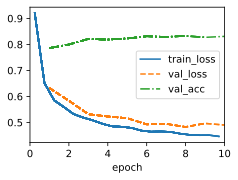

In [182]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [126]:
X,y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis =1)
preds.shape

torch.Size([256])

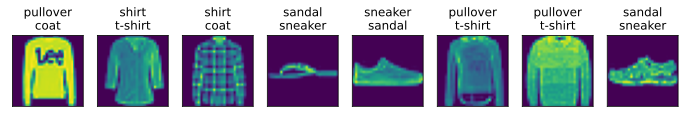

In [127]:
wrong = preds.type(y.dtype)!=y
X,y,preds = X[wrong],y[wrong],preds[wrong]
labels = [a+'\n'+b for a,b in zip(data.text_labels(y),data.text_labels(preds))]
data.visualize([X,y],labels=labels) # the image is not same.

## Discussion

The FashionMNIST dataset is pre-processed and lacks the typical color information present in real-world images. It would be of interest to investigate how the inclusion of color data might affect the model's accuracy. The model has demonstrated difficulties in distinguishing between sneakers and sandals, as well as misclassification of some tops as t-shirts. To solve these challenges, expanding the dataset or employing a more sophisticated model could enhance feature extraction and improve classification accuracy.

# Chapter 5

## 5.1 Multilayer Perceptrons

In [128]:
%matplotlib inline
import torch
from d2l import torch as d2l

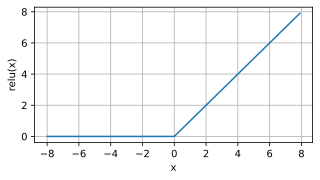

In [129]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad= True)
y = torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize = (5,2.5))

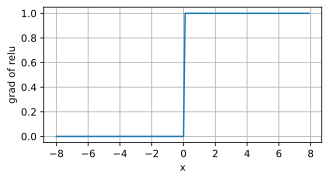

In [130]:
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of relu', figsize = (5,2.5))

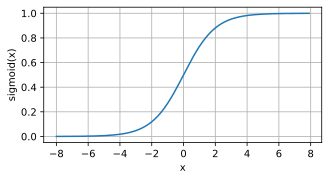

In [131]:
y = torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize = (5,2.5))

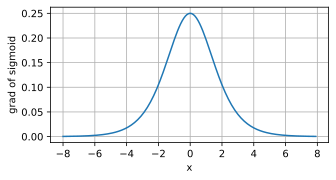

In [132]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize =(5,2.5))

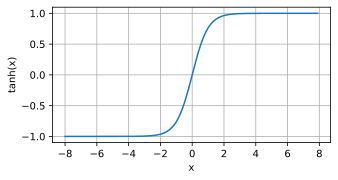

In [133]:
y = torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(5,2.5))

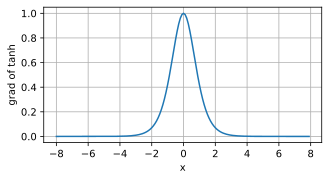

In [134]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize =(5,2.5))

## 5.2 Implementation of Multilayter Perceptrons

In [135]:
import torch
from torch import nn
from d2l import torch as d2l

In [136]:
class MLPScratch(d2l.Classifier):
    def __init__(self,num_inputs, num_outputs, num_hiddens, lr, sigma =0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens)*sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs)*sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [137]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [138]:
@d2l.add_to_class(MLPScratch)
def forward(self,X):
    X = X.reshape((-1,self.num_inputs))
    H = relu(torch.matmul(X,self.W1)+self.b1)
    return torch.matmul(H,self.W2)+self.b2

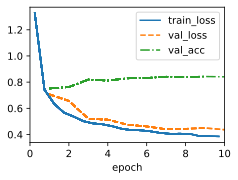

In [139]:
model = MLPScratch(num_inputs = 784, num_outputs = 10, num_hiddens=256, lr =0.1)
data = d2l.FashionMNIST(batch_size = 256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model,data)

In [140]:
class MLP(d2l.Classifier):
    def __init__(self,num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),nn.LazyLinear(num_hiddens),nn.ReLU(),nn.LazyLinear(num_outputs))

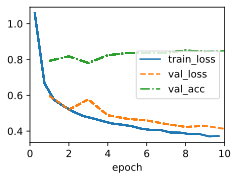

In [141]:
model = MLP(num_outputs = 10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3 Forward Propagation, Backward Propagation, and Computational Graphs

## Discussion

I wonder when, if ever, there will be situations in which sigmoid or tanh would be more useful than relu. When the epoch increases, the loss tends to decrease. If so, I would like to know whether or not it is okay to make the epoch extremely large, and if so, what the reason is.
